In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [84]:
df=pd.read_csv('train.txt', sep=';',header=None,names=['text', 'emotions'])

In [85]:
df

,text,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [9]:
df.head()

,text,emotions
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [88]:
df.tail()

,text,emotions
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger
15999,i know a lot but i feel so stupid because i ca...,sadness


In [91]:
df['text'][15989]

'i need to do this that and the other for college by such and such a date because for the past four years ive always felt like ive been needing to do something college based and now i dont but i still have that feeling its really weird i feel almost guilty in fact'

In [11]:
df.isnull().sum()

text        0
emotions    0
dtype: int64

In [12]:
df['emotions'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [13]:
df['emotions'].value_counts()

emotions
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [14]:
df.shape

(16000, 2)

# Text Preprocessing

# Convert Emotion to integer(mapping)

In [15]:
# unique_emotions = df['emotions'].unique()
# emotions_number={}
# i=0
# for emotion in unique_emotions:
#     emotions_number[emotion]=i
#     i+=1
# df['emotions']=df['emotions'].map(emotions_number)    

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df[['emotions']])
df['emotions'] = le.transform(df['emotions'])

C:\Users\HP-PC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
df['emotions'].unique()

array([4, 0, 3, 5, 1, 2])

In [18]:
df

,text,emotions
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
...,...,...
15995,i just had a very brief time in the beanbag an...,4
15996,i am now turning and i feel pathetic that i am...,4
15997,i feel strong and good overall,2
15998,i feel like this was such a rude comment and i...,0


# convert all test to lower_case

In [19]:
df['text']= df['text'].apply(lambda x:x.lower())

In [20]:
df['text'][0]

'i didnt feel humiliated'

# Remove Punctuation

In [21]:
import string

def remove_punc(txt):
  return txt.translate(str.maketrans('','',string.punctuation))

In [22]:
df

,text,emotions
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
...,...,...
15995,i just had a very brief time in the beanbag an...,4
15996,i am now turning and i feel pathetic that i am...,4
15997,i feel strong and good overall,2
15998,i feel like this was such a rude comment and i...,0


In [23]:
df['text'] = df['text'].apply(remove_punc)

# Rmove Numbers

In [24]:
def remove_numbers(txt):
    new = ""
    for i in txt:
        if not i.isdigit():
            new = new + i
    return new

df['text'] = df['text'].apply(remove_numbers)
     

In [25]:
df

,text,emotions
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
...,...,...
15995,i just had a very brief time in the beanbag an...,4
15996,i am now turning and i feel pathetic that i am...,4
15997,i feel strong and good overall,2
15998,i feel like this was such a rude comment and i...,0


# Remove emojis

In [26]:
# text having ascii values but emojis have code points beyond the ascii range
def remove_emojis(txt):
    new = ""
    for i in txt:
        if i.isascii():
            new += i
    return new

df['text'] = df['text'].apply(remove_emojis)

In [27]:
df

,text,emotions
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0
...,...,...
15995,i just had a very brief time in the beanbag an...,4
15996,i am now turning and i feel pathetic that i am...,4
15997,i feel strong and good overall,2
15998,i feel like this was such a rude comment and i...,0


 NLTK (Natural Language Toolkit) is one of the most popular and beginner-friendly Python libraries for Natural Language Processing (NLP).
Below is a short, clear explanation + example code to get you started quickly.

🔹 What is NLTK?

NLTK is a Python library used for:

Tokenization

Stemming & Lemmatization

Stopword removal

POS tagging

Chunking & Named Entity Recognition

Text classification

Corpus access (WordNet, Brown, Gutenberg, etc.)

In [28]:
import nltk

In [29]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\HP-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\HP-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [31]:
stop_words = set(stopwords.words('english'))

In [32]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

# Remove stopwords

In [33]:
def remove_stopwords(txt):
  words = txt.split()
  cleaned = []
  for i in words:
    if not i in stop_words:
      cleaned.append(i)

  return ' '.join(cleaned)

In [34]:
df['text'][1]

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

In [35]:
df['text'] = df['text'].apply(remove_stopwords)

In [36]:
df['text'][1]

'go feeling hopeless damned hopeful around someone cares awake'

In [37]:
df.head()

,text,emotions
0,didnt feel humiliated,4
1,go feeling hopeless damned hopeful around some...,4
2,im grabbing minute post feel greedy wrong,0
3,ever feeling nostalgic fireplace know still pr...,3
4,feeling grouchy,0


# Feature Extraction / vectorization

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['emotions'], test_size=0.2, random_state=42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12800,), (3200,), (12800,), (3200,))

In [40]:
y_train.shape

(12800,)

In [41]:
y_test.shape

(3200,)

# Bag of Words


In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)

In [43]:
X_train_bow.shape

(12800, 13361)

In [44]:
X_test_bow.shape

(3200, 13361)

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# Models Dictionary 
models = { "Multinomial Naive Bayes": MultinomialNB(),
          "Logistic Regression": LogisticRegression(max_iter=2000), 
          "Linear SVM (LinearSVC)": LinearSVC(), "Decision Tree": DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier(n_estimators=200),
          "KNN": KNeighborsClassifier(n_neighbors=5) 
          }
# Train & Evaluate 
for name, model in models.items():
    model.fit(X_train_bow, y_train) 
    pred = model.predict(X_test_bow)
    acc = accuracy_score(y_test, pred)
    print(f"The accuracy of {name} is: {acc:.4f}")

The accuracy of Multinomial Naive Bayes is: 0.7681
The accuracy of Logistic Regression is: 0.8897
The accuracy of Linear SVM (LinearSVC) is: 0.8903
The accuracy of Decision Tree is: 0.8653
The accuracy of Random Forest is: 0.8831
The accuracy of KNN is: 0.5500


# Using TF - IDF

⭐ TF-IDF (Term Frequency – Inverse Document Frequency)

TfidfVectorizer converts text into numerical vectors by giving higher weight to important words and lower weight to common words.

It improves over Bag of Words (CountVectorizer).

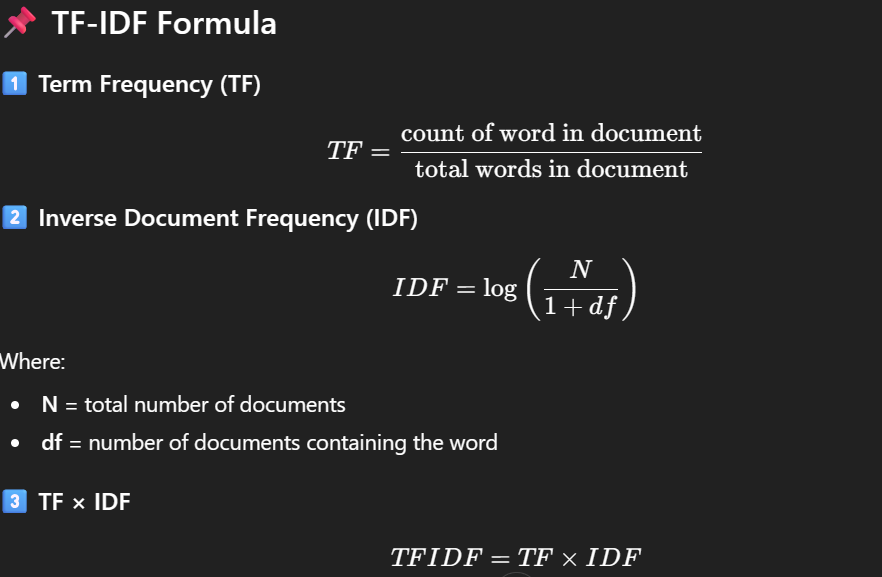

In [47]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Hperparameter Tuning

In [48]:
# Models Dictionary
models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Linear SVM (LinearSVC)": LinearSVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}
# Train & Evaluate
for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, pred)
    print(f"The accuracy of {name} is: {acc:.4f}")



The accuracy of Multinomial Naive Bayes is: 0.6609
The accuracy of Logistic Regression is: 0.8628
The accuracy of Linear SVM (LinearSVC) is: 0.8919
The accuracy of Decision Tree is: 0.8603
The accuracy of Random Forest is: 0.8859
The accuracy of KNN is: 0.7837


# hypertuninig of best Model SVM(Linear SVC)-tfidf

In [68]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid_svc = {
    'C': [0.01, 0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge'],
    'tol': [1e-4, 1e-3, 1e-2]
}
grid_svc = GridSearchCV(
    estimator=LinearSVC(),
    param_grid=param_grid_svc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_svc.fit(X_train_tfidf, y_train)
print("Best Parameters:", grid_svc.best_params_)
best_tfidf_svc = grid_svc.best_estimator_
pred_svc = best_tfidf_svc.predict(X_test_tfidf)
acc = accuracy_score(y_test, pred_svc)
print(f"Accuracy after tuning (LinearSVC): {acc:.4f}")


Best Parameters: {'C': 1, 'loss': 'hinge', 'tol': 0.0001}
Accuracy after tuning (LinearSVC): 0.8928


# hypertuninig of best Model SVM(Linear SVC)- Bag of words

In [50]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid_svc = {
    'C': [0.01, 0.1, 1, 10],
    'loss': ['hinge', 'squared_hinge'],
    'tol': [1e-4, 1e-3, 1e-2]
}
grid_svc = GridSearchCV(
    estimator=LinearSVC(),
    param_grid=param_grid_svc,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid_svc.fit(X_train_bow, y_train)
print("Best Parameters:", grid_svc.best_params_)
best_svc = grid_svc.best_estimator_
pred_svc = best_svc.predict(X_test_bow)
acc = accuracy_score(y_test, pred_svc)
print(f"Accuracy after tuning (LinearSVC on BoW): {acc:.4f}")


Best Parameters: {'C': 0.1, 'loss': 'squared_hinge', 'tol': 0.0001}
Accuracy after tuning (LinearSVC on BoW): 0.9006


# XgBoost Boosting Technique

In [53]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# 1. Feature Selection (FAST)
selector = SelectKBest(chi2, k=5000) 
X_train_sel = selector.fit_transform(X_train_tfidf, y_train)
X_test_sel = selector.transform(X_test_tfidf)

# 2. XGBoost Model
xgb = XGBClassifier(
    objective="multi:softmax",   
    eval_metric="mlogloss",
    tree_method='hist',     
    random_state=42
)

# 3. Fast Hyperparameter Search
param_dist = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.03, 0.05, 0.1],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

random_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=20,            
    cv=3,               
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=42
)
random_xgb.fit(X_train_sel, y_train)
print("Best Parameters:", random_xgb.best_params_)
best_xgb = random_xgb.best_estimator_
pred_xgb = best_xgb.predict(X_test_sel)
acc = accuracy_score(y_test, pred_xgb)
print(f"FAST XGBoost Accuracy: {acc:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
FAST XGBoost Accuracy: 0.8462


In [52]:
def to_lower(text):
    return text.lower()

In [55]:
def clean(text):
    text = to_lower(text)           # convert to lowercase
    text = remove_punc(text)        # remove punctuation
    text = remove_numbers(text)     # remove numbers
    text = remove_emojis(text)      # remove emojis
    text = remove_stopwords(text)   # remove stopwords
    return text


In [ ]:
# def predict_emotion(text):
#     cleaned_text = clean(text)  
#     input_features = bow_vectorizer.transform([cleaned_text])
#     pred_id = best_svc.predict(input_features)[0]
#     emotion_name = le.inverse_transform([pred_id])[0]
#     return emotion_name


In [69]:
def predict_emotion(text):
    cleaned_text = clean(text)
    input_features = tfidf_vectorizer.transform([cleaned_text])
    pred_id = best_tfidf_svc.predict(input_features)[0]
    emotion_name = le.inverse_transform([pred_id])[0]
    return emotion_name


In [94]:
sample_text ="I was shocked when I heard the news."
predicted_emotion = predict_emotion(sample_text)
print("Predicted Emotion:", predicted_emotion)


Predicted Emotion: surprise


In [71]:
sample_text = """
OMG!!! I just got the job offer I applied for last month 😄🎉. 
I can’t believe it… after so many interviews and rejections 😅. 
Finally, my hard work paid off!!! #blessed #happy 100% excited 💯💃
"""

In [72]:
predicted_emotion = predict_emotion(sample_text)
print("Predicted Emotion:", predicted_emotion)

Predicted Emotion: joy


In [73]:
sample_text= """
Ugh... today was so bad 😔. My project failed AGAIN 😢!! 
I spent 10+ hours coding, debugging, testing, and nothing worked. 
Feeling hopeless, tired, and demotivated… 0 motivation left 😞💔
"""


In [74]:
predicted_emotion = predict_emotion(sample_text)
print("Predicted Emotion:", predicted_emotion)

Predicted Emotion: sadness


In [75]:
sample_text = """
I am so angry right now!!! 😡💢 The server crashed 3 times today. 
My teammates didn’t push their commits properly, and now I am stuck fixing everything 😤. 
Unbelievable!!! #frustration #workload
"""


In [76]:
predicted_emotion = predict_emotion(sample_text)
print("Predicted Emotion:", predicted_emotion)

Predicted Emotion: anger


In [77]:
sample_text= """
I have a BIG presentation tomorrow 😨📊 and I am so nervous!! 
What if I forget everything or mess up in front of everyone??? 1000 thoughts in my head... 
My heart is racing, hands shaking, and I can’t focus 😰😓
"""


In [78]:
predicted_emotion = predict_emotion(sample_text)
print("Predicted Emotion:", predicted_emotion)

Predicted Emotion: fear


In [79]:
sample_text = """
WOW!!! 😲 I can’t believe it! Today I just got a call saying I won a free vacation 
to Hawaii 🏖️✈️. I entered the contest just a few days ago and never expected to win 😱. 
My friends were cheering, my phone won’t stop buzzing 📱🎉, and I’m literally jumping 
around in excitement! 100% unexpected, totally shocking, and so much fun!!! 😍💃🎊
"""


In [82]:
predicted_emotion = predict_emotion(sample_text)
print("Predicted Emotion:", predicted_emotion)

Predicted Emotion: joy


In [83]:
import pickle

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)
with open("tfidf_svc_model.pkl", "wb") as f:
    pickle.dump(best_tfidf_svc, f)
    
print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!
